# setup

In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.spatial import distance_matrix

# data

In [2]:
hdf5_path = 'data\BioBERTpt_text_report_crop.h5'
metadata_path = 'data\exams.csv'

In [3]:
hdf5_file = h5py.File(hdf5_path, "r")
hdf5_file

<HDF5 file "BioBERTpt_text_report_crop.h5" (mode r)>

In [4]:
metadata = pd.read_csv(metadata_path)
metadata

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307635,236469,26,True,29.119510,False,False,False,False,False,False,1103788,False,4.115065,True,exams_part2.hdf5
307636,1123951,33,True,35.893005,False,False,False,False,False,False,770553,False,2.189039,True,exams_part2.hdf5
307637,954704,73,False,68.169136,False,False,False,False,False,False,1044781,False,2.520546,False,exams_part2.hdf5
307638,589697,75,False,78.080810,False,False,False,False,False,False,1020589,False,3.304107,False,exams_part2.hdf5


# draft

In [5]:
hdf5_file['embeddings'], hdf5_file['exam_id']

(<HDF5 dataset "embeddings": shape (307640, 768), type "<f8">,
 <HDF5 dataset "exam_id": shape (307640,), type "<i4">)

In [6]:
labels = ['1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF']
y = metadata[labels].values
y

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False,  True],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [7]:
np.unique(np.sum(y, axis = 1), return_counts = True)

(array([0, 1, 2, 3, 4]),
 array([271520,  32599,   3342,    174,      5], dtype=int64))

In [8]:
solo_idx = np.sum(y, axis = 1) == 1
solo = metadata['exam_id'].values[solo_idx]
solo.shape, solo

((32599,),
 array([ 168405,  132538,  552294, ...,  844597, 1066754, 1516436],
       dtype=int64))

# loop

In [9]:
log = []
for i in tqdm(range(len(hdf5_file['embeddings']))):
    exam_id = hdf5_file['exam_id'][i]
    if np.isin(exam_id, solo):
        h = hdf5_file['embeddings'][i]
        log.append([i, h, exam_id])

100%|██████████| 307640/307640 [07:51<00:00, 652.43it/s]


In [10]:
df_solo = pd.DataFrame(log, columns = ['i', 'h', 'exam_id'])
df_solo

,i,h,exam_id
0,4,"[-0.18926101922988892, -0.4255780577659607, 0....",223229
1,38,"[-0.29741084575653076, -0.4555043578147888, 0....",1447877
2,48,"[-0.031871698796749115, -0.37642207741737366, ...",1556232
3,50,"[-0.28566694259643555, -0.47660186886787415, 0...",2743813
4,53,"[-0.17875854671001434, -0.48081856966018677, 0...",3021541
...,...,...,...
32594,307614,"[-0.22444242238998413, -0.45761215686798096, 0...",1922613
32595,307623,"[-0.3149453103542328, -0.3560342788696289, 0.4...",1930725
32596,307624,"[-0.3649442493915558, -0.6875954866409302, 0.7...",1935323
32597,307626,"[-0.23801323771476746, -0.3855261206626892, 0....",2066206


In [11]:
solo_y = []
for idx, row in tqdm(df_solo.iterrows()):
    exam_id = row['exam_id']
    label = y[metadata['exam_id'] == exam_id]
    solo_y.append(np.where(label[0])[0][0])

In [18]:
np.unique(solo_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([4010, 7250, 4579, 4679, 6711, 5370], dtype=int64))

In [13]:
solo_y = np.array(solo_y)
ordenado = np.argsort(solo_y)
ordenado, solo_y[ordenado]

(array([17917, 21157, 13969, ..., 14251, 14263, 14088], dtype=int64),
 array([0, 0, 0, ..., 5, 5, 5], dtype=int64))

In [14]:
df_solo['h'].values[ordenado]

array([array([-2.05260143e-01, -4.47776020e-01,  6.89154863e-01,  1.43260866e-01,
               4.58801210e-01,  2.97554791e-01, -2.01118827e-01, -2.36432225e-01,
               2.86683500e-01, -2.85476208e-01, -1.17008463e-01,  9.31459889e-02,
               1.85738921e-01,  3.65466066e-02,  2.67281175e-01,  8.67960453e-02,
               6.15239322e-01, -4.61377382e-01,  6.56334683e-03, -7.49056563e-02,
              -2.94743001e-01,  2.50877917e-01,  4.16409671e-01,  1.63740426e-01,
               5.63716829e-01,  2.35701218e-01, -4.89990294e-01,  3.04296613e-01,
              -2.06992283e-01, -4.53589916e-01, -6.64757490e-02,  3.70588601e-02,
              -3.22649956e-01,  3.25865686e-01, -2.05712527e-01, -4.39351425e-02,
               4.88977879e-02,  3.23165536e-01,  1.79975763e-01, -3.01775575e-01,
              -4.68508676e-02,  3.66589427e-01,  1.94587231e-01, -6.15246773e-01,
               2.52798021e-01, -3.39248419e-01,  3.84113669e-01,  4.03725281e-02,
              -1

# dist

In [15]:
H = np.stack(df_solo['h'].values[ordenado])
H.shape, H

((32599, 768),
 array([[-0.20526014, -0.44777602,  0.68915486, ...,  0.06351753,
         -0.03035823, -0.38066781],
        [-0.27870363, -0.51122415,  0.71035349, ..., -0.22038792,
         -0.52979404, -0.56404376],
        [-0.22206929, -0.57862777,  0.61819732, ..., -0.16468428,
         -0.4761562 , -0.57830423],
        ...,
        [-0.19108438, -0.59679151,  0.66032737, ..., -0.07926573,
         -0.45977131, -0.56179255],
        [-0.12096551, -0.38562354,  0.56232429, ..., -0.09936243,
          0.1198035 , -0.30989966],
        [-0.12096551, -0.38562354,  0.56232429, ..., -0.09936243,
          0.1198035 , -0.30989966]]))

In [16]:
dist = distance_matrix(H, H)
dist.shape, dist

((32599, 32599),
 array([[0.        , 6.13436693, 6.49349666, ..., 6.54325105, 3.31225407,
         3.31225407],
        [6.13436693, 0.        , 3.65967562, ..., 4.6662579 , 6.04193701,
         6.04193701],
        [6.49349666, 3.65967562, 0.        , ..., 4.85418636, 6.41229697,
         6.41229697],
        ...,
        [6.54325105, 4.6662579 , 4.85418636, ..., 0.        , 5.94000679,
         5.94000679],
        [3.31225407, 6.04193701, 6.41229697, ..., 5.94000679, 0.        ,
         0.        ],
        [3.31225407, 6.04193701, 6.41229697, ..., 5.94000679, 0.        ,
         0.        ]]))

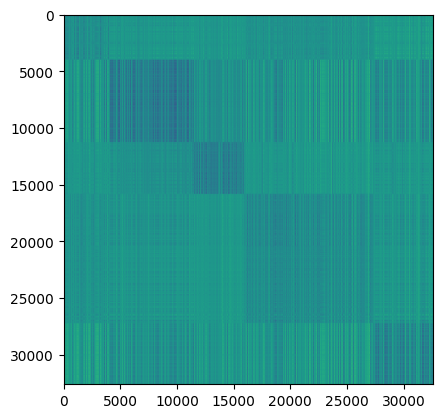

In [17]:
plt.imshow(dist);

In [22]:
unicos, counts = np.unique(solo_y, return_counts = True)
cumulativo = np.cumsum(counts)
unicos, counts, cumulativo

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([4010, 7250, 4579, 4679, 6711, 5370], dtype=int64),
 array([ 4010, 11260, 15839, 20518, 27229, 32599], dtype=int64))

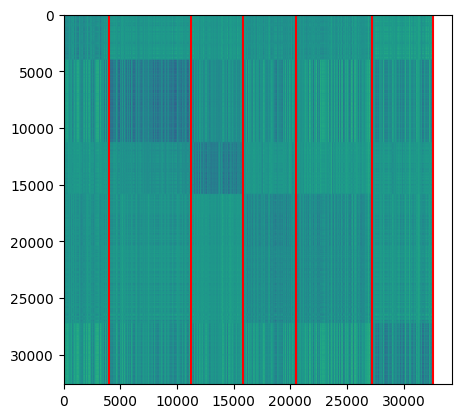

In [33]:
# plt.imshow(dist[:300, :300]);
plt.imshow(dist);
for c in cumulativo:
    plt.axvline(x = c, color = 'red');
    # plt.axhline(y = c, color = 'red');

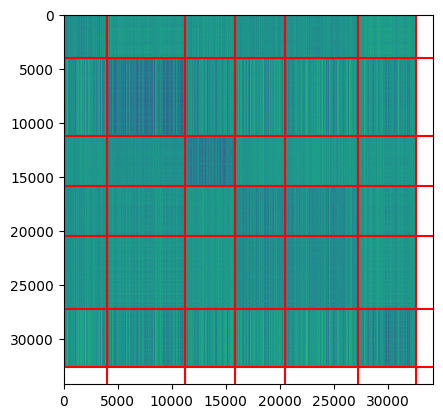

In [34]:
# plt.imshow(dist[:300, :300]);
plt.imshow(dist);
for c in cumulativo:
    plt.axvline(x = c, color = 'red');
    plt.axhline(y = c, color = 'red');